In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gauravduttakiit/automated-egg-classification")

print("Path to dataset files:", path)

100%|██████████| 5.14G/5.14G [01:03<00:00, 86.3MB/s]


Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/gauravduttakiit/automated-egg-classification/versions/1


In [2]:
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers, models

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [3]:
train_dir =path + '/train/'
test_dir =path + '/test/'

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

Found 11783 images belonging to 2 classes.


In [6]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

Found 2946 images belonging to 2 classes.


In [7]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


369/369 ━━━━━━━━━━━━━━━━━━━━ 146s 375ms/step - accuracy: 0.9492 - loss: 0.1032 - val_accuracy: 1.0000 - val_loss: 1.3683e-04
Epoch 2/10
369/369 ━━━━━━━━━━━━━━━━━━━━ 127s 340ms/step - accuracy: 1.0000 - loss: 7.6045e-05 - val_accuracy: 0.9993 - val_loss: 0.0012
Epoch 3/10
369/369 ━━━━━━━━━━━━━━━━━━━━ 125s 295ms/step - accuracy: 1.0000 - loss: 3.5200e-05 - val_accuracy: 1.0000 - val_loss: 1.6448e-06
Epoch 4/10
369/369 ━━━━━━━━━━━━━━━━━━━━ 142s 294ms/step - accuracy: 1.0000 - loss: 2.1813e-06 - val_accuracy: 1.0000 - val_loss: 9.1400e-07
Epoch 5/10
369/369 ━━━━━━━━━━━━━━━━━━━━ 140s 289ms/step - accuracy: 1.0000 - loss: 1.0383e-06 - val_accuracy: 1.0000 - val_loss: 5.8351e-07
Epoch 6/10
369/369 ━━━━━━━━━━━━━━━━━━━━ 108s 289ms/step - accuracy: 1.0000 - loss: 7.3111e-07 - val_accuracy: 1.0000 - val_loss: 4.1770e-07
Epoch 7/10
369/369 ━━━━━━━━━━━━━━━━━━━━ 109s 292ms/step - accuracy: 1.0000 - loss: 5.3929e-07 - val_accuracy: 1.0000 - val_loss: 3.1152e-07
Epoch 8/10
369/369 ━━━━━━━━━━━━━━━━━━━━

In [11]:
loss, accuracy = model.evaluate(test_generator)
print("Test Accuracy:", accuracy)


93/93 ━━━━━━━━━━━━━━━━━━━━ 22s 235ms/step - accuracy: 1.0000 - loss: 2.1046e-07
Test Accuracy: 1.0


In [15]:
img_path =test_dir + '/Duck/aug_0_1005_243820b35e12417dbb130071f58e56b4.png'
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
if prediction[0][0] > 0.5:
    print("Duck Egg")
else:
    print("Chicken Egg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Duck Egg


In [16]:
def predict_image(model, img_path):
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    return "Duck" if prediction[0][0] > 0.5 else "Chicken"

In [17]:
test_dir =path + '/test/'
classes = ['Chicken', 'Duck']

In [18]:
selected_images = []
for label in classes:
    class_dir = os.path.join(test_dir, label)
    images = os.listdir(class_dir)
    selected_images.extend([os.path.join(class_dir, img) for img in images[:5]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


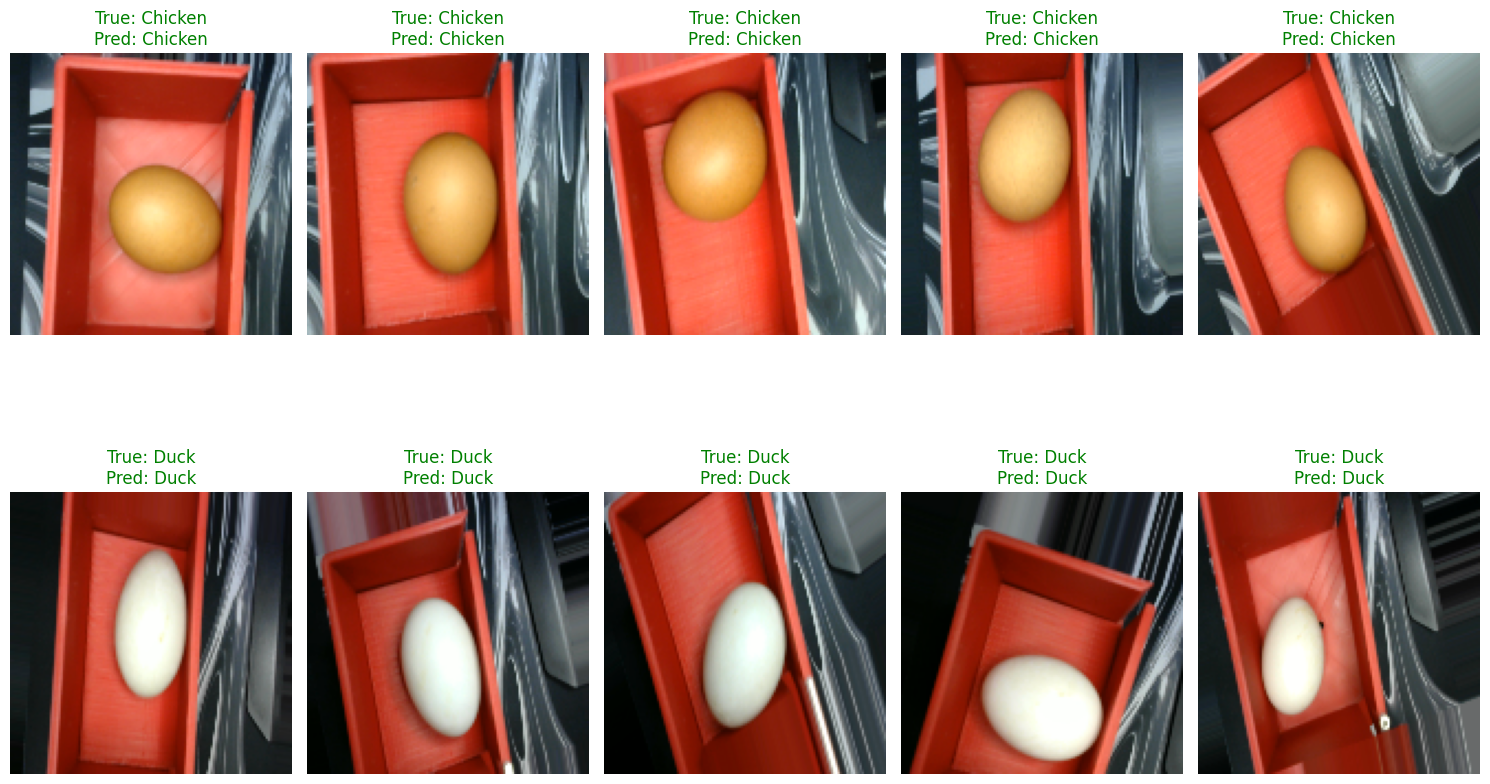

In [19]:
plt.figure(figsize=(15, 10))
for i, img_path in enumerate(selected_images):
    prediction = predict_image(model, img_path)

    img = image.load_img(img_path, target_size=(128, 128))

    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')

    true_label = "Duck" if "Duck" in img_path else "Chicken"
    plt.title(f"True: {true_label}\nPred: {prediction}", color="green" if true_label == prediction else "red")

plt.tight_layout()
plt.show()